# Analyzing NYC Air Quality (2018-2022)

### Author: Omid Emamjomehzadeh
### Course instructor: Andre Butler

In [19]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from scipy.stats import f_oneway
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson, zscore
from numpy import log, sqrt, exp, arcsin
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import shapiro, boxcox, yeojohnson, zscore, levene
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

### load and plot AQI and meterological varibles

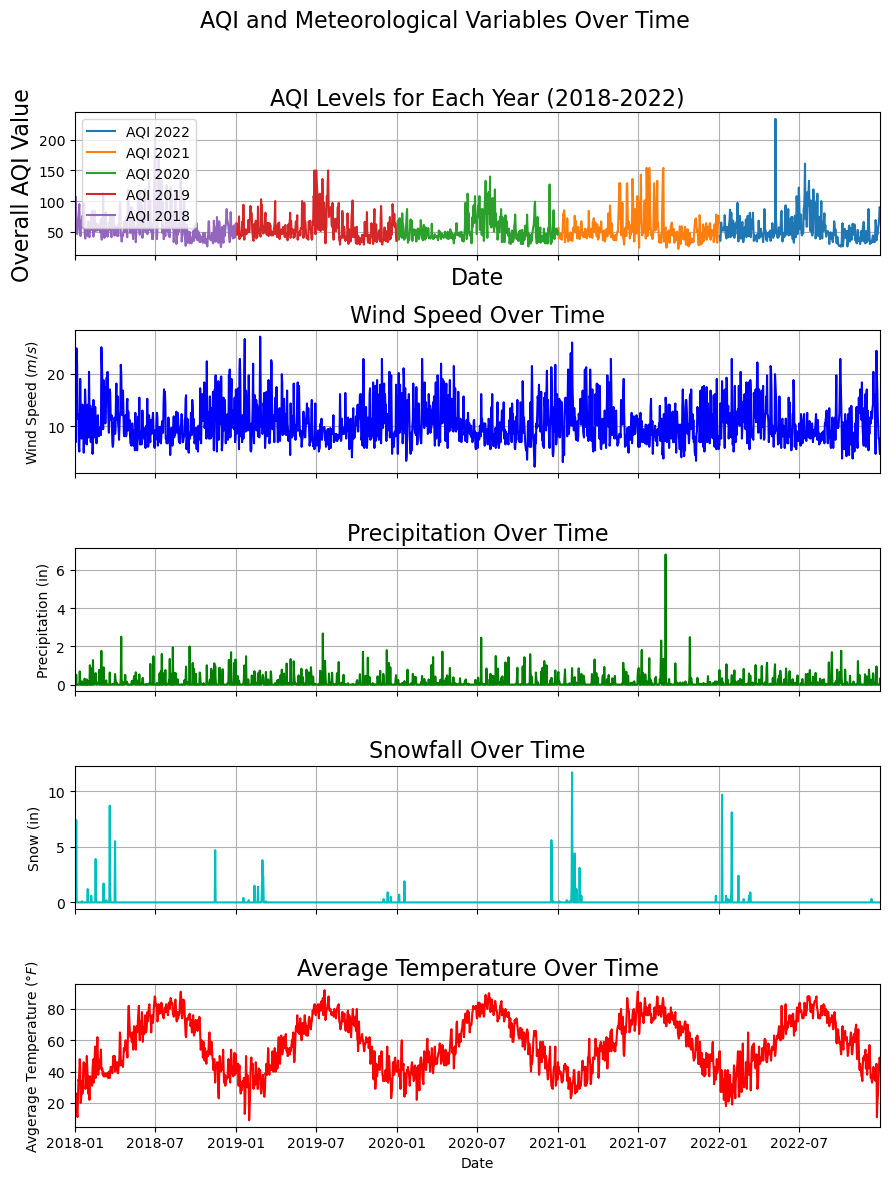

In [30]:
# Load the Excel file
file_path = r"C:\Users\Omid Emamjomehzadeh\Desktop\project_data_Fall2024 (1).xlsx"
excel_data = pd.ExcelFile(file_path)

# List of AQI sheets to load
aqi_sheets = ["ce-uy project1 data spring 2022", "aqidaily2021", "aqidaily2020", "aqidaily2019", "aqidaily2018"]
aqi_data = {}

# Load and process each AQI sheet
for sheet in aqi_sheets:
    df = excel_data.parse(sheet)
    df['Date'] = pd.to_datetime(df['Date'])
    year = sheet[-4:]
    aqi_data[year] = df

# Load meteorological data
met_data = excel_data.parse("Met2018-2022")
met_data['DATE'] = pd.to_datetime(met_data['DATE'])
met_data.set_index('DATE', inplace=True)

# Create a figure with five subplots (1 for AQI and 4 for meteorological variables)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(9, 12), sharex=True)
fig.suptitle("AQI and Meteorological Variables Over Time", fontsize=16)

# AQI plot (top subplot)
# Combine all AQI dataframes to find the common date range
all_aqi_dates = pd.concat([df['Date'] for df in aqi_data.values()]).sort_values()
start_date = all_aqi_dates.min()
end_date = all_aqi_dates.max()

for year, df in aqi_data.items():
    axes[0].plot(df['Date'], df['Overall AQI Value'], label=f"AQI {year}")

axes[0].set_xlabel("Date", fontsize=16)
axes[0].set_ylabel("Overall AQI Value", fontsize=16)
axes[0].legend(loc='upper left',)
axes[0].grid(True)
axes[0].set_title("AQI Levels for Each Year (2018-2022)", fontsize=16)
axes[0].set_xlim([start_date, end_date])

# Plot Wind Speed
axes[1].plot(met_data.index, met_data['WS[m/s]'], color='b', label='Wind Speed')
axes[1].set_ylabel(f"Wind Speed ($m/s$)")
axes[1].grid(True)
axes[1].set_title("Wind Speed Over Time", fontsize=16)
axes[1].set_xlim([start_date, end_date])

# Plot Precipitation
axes[2].plot(met_data.index, met_data['PRCP[in]'], color='g', label='Precipitation')
axes[2].set_ylabel("Precipitation (in)")
axes[2].grid(True)
axes[2].set_title("Precipitation Over Time", fontsize=16)
axes[2].set_xlim([start_date, end_date])

# Plot Snow
axes[3].plot(met_data.index, met_data['SNOW[in]'], color='c', label='Snow')
axes[3].set_ylabel("Snow (in)")
axes[3].grid(True)
axes[3].set_title("Snowfall Over Time", fontsize=16)
axes[3].set_xlim([start_date, end_date])

# Plot Average Temperature
axes[4].plot(met_data.index, met_data['TAVG[°F]'], color='r', label='Avg Temp (°F)')
axes[4].set_ylabel(f"Avgerage Temperature ($°F$)")
axes[4].set_xlabel("Date")
axes[4].grid(True)
axes[4].set_title("Average Temperature Over Time", fontsize=16)
axes[4].set_xlim([start_date, end_date])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
plt.savefig(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Images\merged_plot_with_met_variables.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


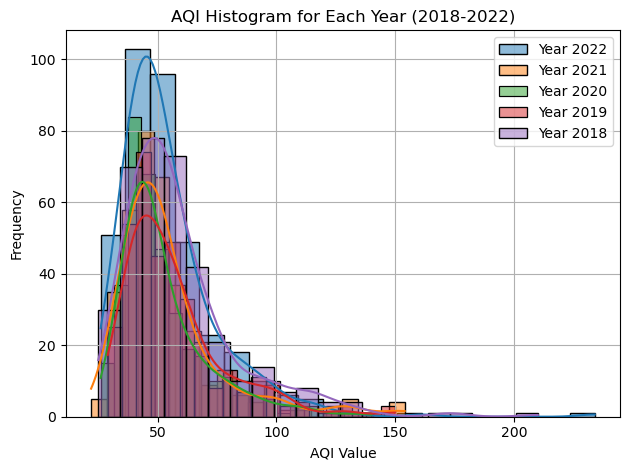

In [26]:
# Plot histogram with KDE for each year's AQI data
for year, df in aqi_data.items():
    sns.histplot(df['Overall AQI Value'], kde=True, label=f"Year {year}", alpha=0.5, bins=20)

plt.title("AQI Histogram for Each Year (2018-2022)")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Images\AQI_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Calculate statistics of AQI over each year

In [4]:
# Combine all AQI data into one DataFrame for comparison
all_aqi_data = pd.concat(aqi_data.values())
all_aqi_data['Year'] = all_aqi_data['Date'].dt.year  # Add the year for grouping

#
# Summary Statistics
summary_stats = all_aqi_data.groupby('Year')['Overall AQI Value'].describe()
print("Summary Statistics of AQI (2018-2022):")
print(summary_stats)

# You can also calculate the percentage of days in each year with hazardous air quality (AQI > 300)
hazardous_days = all_aqi_data[all_aqi_data['Overall AQI Value'] > 300].groupby('Year').size()
total_days = all_aqi_data.groupby('Year').size()
hazardous_percentage = (hazardous_days / total_days) * 100

print("\nPercentage of Hazardous Days (AQI > 300) per Year:")
print(hazardous_percentage)
# Save hazardous percentage to CSV
summary_stats.to_csv(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Outputs\summary_stats_AQI.csv')

Summary Statistics of AQI (2018-2022):
      count       mean        std   min   25%   50%   75%    max
Year                                                            
2018  365.0  58.934247  24.731216  25.0  43.0  53.0  67.0  210.0
2019  365.0  56.849315  21.477864  29.0  42.0  51.0  64.0  150.0
2020  366.0  52.655738  18.821048  26.0  40.0  47.0  59.0  140.0
2021  365.0  54.813699  23.059725  22.0  41.0  49.0  60.0  154.0
2022  365.0  54.356164  21.635701  26.0  41.0  49.0  61.0  234.0

Percentage of Hazardous Days (AQI > 300) per Year:
Year
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
dtype: float64


In [5]:
# Collect AQI values for each year
aqi_values_by_year = [df['Overall AQI Value'] for year, df in aqi_data.items()]

# Perform Levene's Test for homogeneity of variances
stat, p_value = stats.levene(*aqi_values_by_year)

# Display the result
if p_value < 0.05:
    print("The variances are significantly different between years (reject the null hypothesis).")
else:
    print("The variances are not significantly different between years (fail to reject the null hypothesis).")

The variances are not significantly different between years (fail to reject the null hypothesis).


In [6]:
for year, df in aqi_data.items():
    stat, p_value = stats.shapiro(df['Overall AQI Value'])
    print(f"Year: {year}, p-value: {p_value}")
    if p_value < 0.05:
        print("Data is not normal.")
    else:
        print("Data is normal.")

Year: 2022, p-value: 1.2340443905994918e-20
Data is not normal.
Year: 2021, p-value: 3.3765918964720457e-21
Data is not normal.
Year: 2020, p-value: 1.2350370068407252e-18
Data is not normal.
Year: 2019, p-value: 7.729837330354345e-18
Data is not normal.
Year: 2018, p-value: 1.8673747230443024e-19
Data is not normal.


In [7]:
stat, p_value = stats.kruskal(*aqi_values_by_year)
if p_value < 0.05:
    print("There are significant differences between years (reject the null hypothesis).")
else:
    print("There are no significant differences between years (fail to reject the null hypothesis).")


There are significant differences between years (reject the null hypothesis).


Variance Homogeneity Results
Transformation      p-value                               Result
           log 2.891854e-01 Fail to reject (variances are equal)
          sqrt 1.398420e-01 Fail to reject (variances are equal)
        boxcox 1.373005e-84     Reject (variances are different)
    yeojohnson 1.474637e-87     Reject (variances are different)
    reciprocal 7.400196e-01 Fail to reject (variances are equal)
      inv_sqrt 5.487911e-01 Fail to reject (variances are equal)
   arcsin_sqrt 2.210300e-04     Reject (variances are different)
        zscore 8.245243e-01 Fail to reject (variances are equal)

Normality Test Results
Year Transformation  Test Statistic      p-value                  Result
2022            log        0.970522 9.359418e-07     Reject (not normal)
2022           sqrt        0.909760 5.961329e-14     Reject (not normal)
2022         boxcox        0.995700 4.185887e-01 Fail to reject (normal)
2022     yeojohnson        0.995710 4.205521e-01 Fail to reject (norma

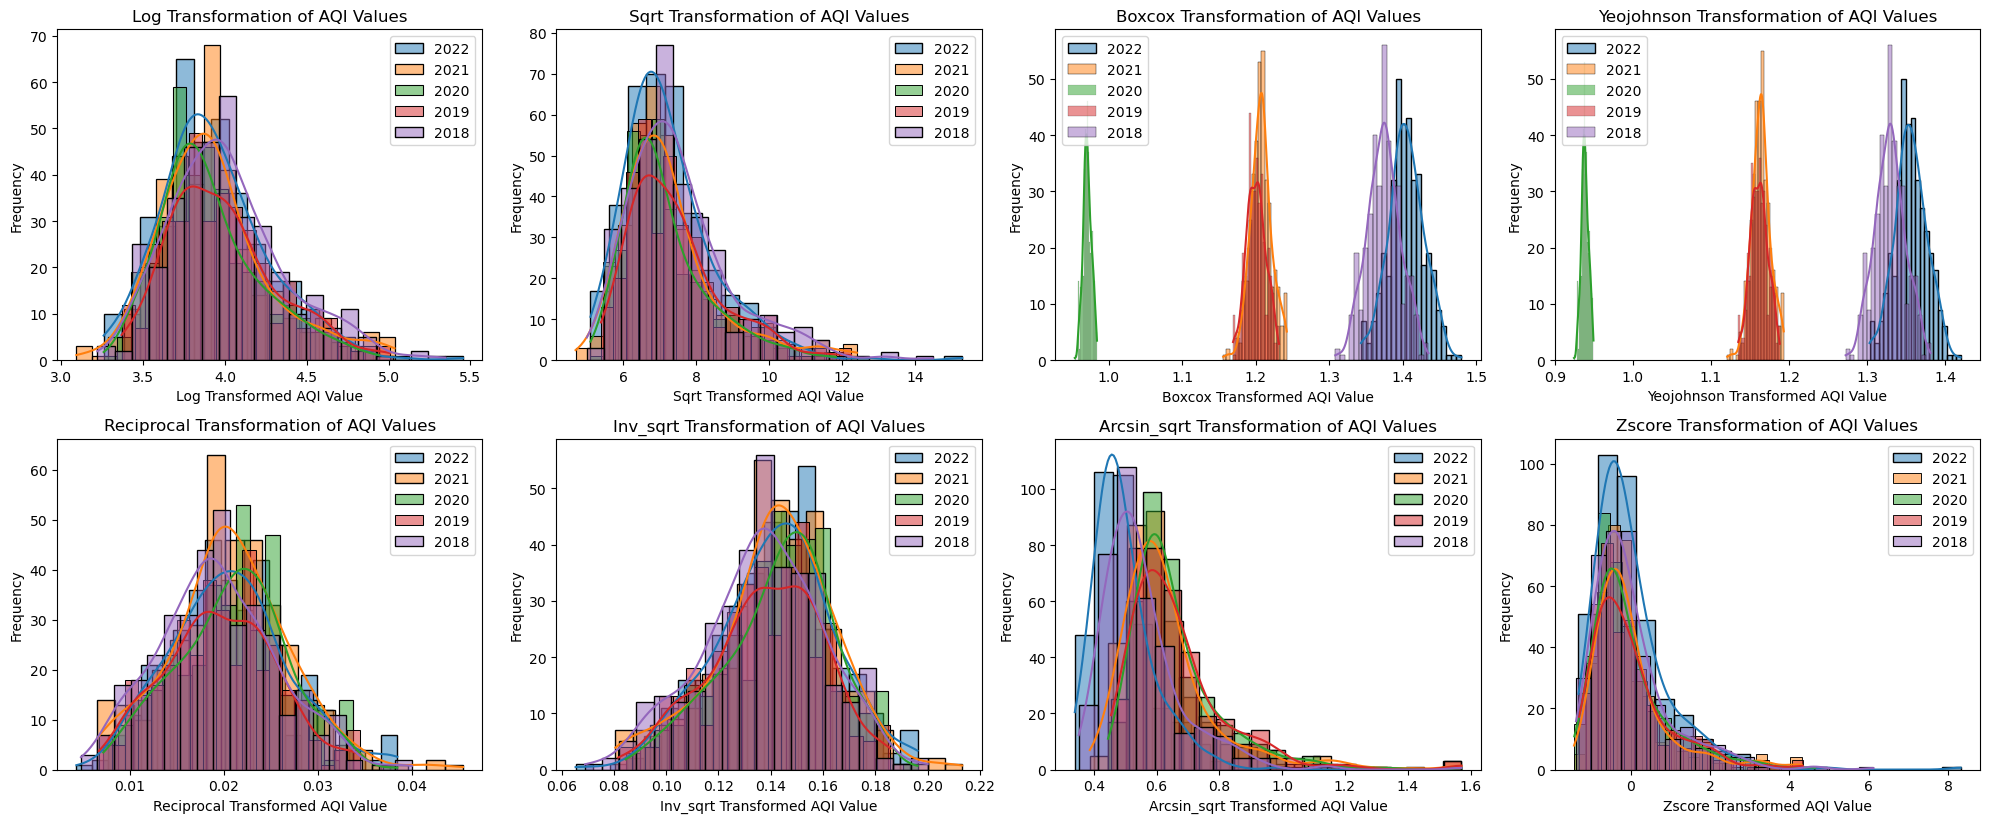

In [20]:
# Function to apply multiple transformations and test variance homogeneity and normality
def apply_multiple_transformations_and_test(aqi_data):
    transformed_data = {}
    variance_results = {}
    normality_results = {}
    
    for year, df in aqi_data.items():
        aqi_values = df['Overall AQI Value']
        
        # Apply Log transformation (shift values if necessary to avoid log(0))
        if np.any(aqi_values <= 0):
            aqi_values_log = np.log(aqi_values + abs(np.min(aqi_values)) + 1)
        else:
            aqi_values_log = np.log(aqi_values)
        
        # Apply Square Root transformation
        aqi_values_sqrt = np.sqrt(aqi_values)
        
        # Apply Box-Cox transformation (only for positive values)
        aqi_values_boxcox, _ = boxcox(aqi_values + abs(np.min(aqi_values)) + 1) if np.any(aqi_values <= 0) else boxcox(aqi_values)
        
        # Apply Yeo-Johnson transformation
        aqi_values_yeojohnson, _ = yeojohnson(aqi_values)
        
        # Apply Reciprocal transformation
        aqi_values_reciprocal = 1 / (aqi_values + 1e-5)  # Add small constant to avoid division by zero
        
        
        
        # Apply Inverse Square Root transformation
        aqi_values_inv_sqrt = 1 / np.sqrt(aqi_values + 1e-5)  # Add small constant to avoid division by zero
        
        # Apply Arcsine Square Root transformation (for proportions, e.g., between 0 and 1)
        aqi_values_arcsin_sqrt = np.arcsin(np.sqrt(aqi_values / np.max(aqi_values))) if np.max(aqi_values) != 0 else np.zeros_like(aqi_values)
        
        # Apply Z-score Standardization
        aqi_values_zscore = zscore(aqi_values)
        
        # Store transformed data
        transformed_data[year] = {
            "log": aqi_values_log,
            "sqrt": aqi_values_sqrt,
            "boxcox": aqi_values_boxcox,
            "yeojohnson": aqi_values_yeojohnson,
            "reciprocal": aqi_values_reciprocal,
            "inv_sqrt": aqi_values_inv_sqrt,
            "arcsin_sqrt": aqi_values_arcsin_sqrt,
            "zscore": aqi_values_zscore
        }
        
        # Perform Shapiro-Wilk test for normality on all transformations
        normality_results[year] = {
            "log": stats.shapiro(aqi_values_log),
            "sqrt": stats.shapiro(aqi_values_sqrt),
            "boxcox": stats.shapiro(aqi_values_boxcox),
            "yeojohnson": stats.shapiro(aqi_values_yeojohnson),
            "reciprocal": stats.shapiro(aqi_values_reciprocal),
            "inv_sqrt": stats.shapiro(aqi_values_inv_sqrt),
            "arcsin_sqrt": stats.shapiro(aqi_values_arcsin_sqrt),
            "zscore": stats.shapiro(aqi_values_zscore)
        }
    
    # Perform Levene's test for homogeneity of variances on all transformations
    transformed_by_year = {
        "log": [transformed_data[year]["log"] for year in transformed_data],
        "sqrt": [transformed_data[year]["sqrt"] for year in transformed_data],
        "boxcox": [transformed_data[year]["boxcox"] for year in transformed_data],
        "yeojohnson": [transformed_data[year]["yeojohnson"] for year in transformed_data],
        "reciprocal": [transformed_data[year]["reciprocal"] for year in transformed_data],
        "inv_sqrt": [transformed_data[year]["inv_sqrt"] for year in transformed_data],
        "arcsin_sqrt": [transformed_data[year]["arcsin_sqrt"] for year in transformed_data],
        "zscore": [transformed_data[year]["zscore"] for year in transformed_data]
    }
    
    variance_results = {key: stats.levene(*value)[1] for key, value in transformed_by_year.items()}
    
    return transformed_data, variance_results, normality_results

# Apply transformations and test variance homogeneity and normality
transformed_data, variance_results, normality_results = apply_multiple_transformations_and_test(aqi_data)

# Step 1: Variance Homogeneity Table
variance_results_df = pd.DataFrame(
    list(variance_results.items()),
    columns=['Transformation', 'p-value']
)
variance_results_df['Result'] = variance_results_df['p-value'].apply(
    lambda p: "Fail to reject (variances are equal)" if p >= 0.05 else "Reject (variances are different)"
)
print("Variance Homogeneity Results")
print(variance_results_df.to_string(index=False))
variance_results_df.to_csv(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Outputs\variance_stability_results.csv')
# Step 2: Normality Test Table
normality_results_data = []
for year, results in normality_results.items():
    for transform, (stat, p_value) in results.items():
        normality_results_data.append({
            "Year": year,
            "Transformation": transform,
            "Test Statistic": stat,
            "p-value": p_value,
            "Result": "Fail to reject (normal)" if p_value >= 0.05 else "Reject (not normal)"
        })
normality_results_df = pd.DataFrame(normality_results_data)
print("\nNormality Test Results")
print(normality_results_df.to_string(index=False))
normality_results_df.to_csv(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Outputs\normality_results.csv')

# Step 3: Visualization of Transformed Data
plt.figure(figsize=(20, 12))
transformations = list(transformed_data[next(iter(transformed_data))].keys())

for i, transform in enumerate(transformations):
    plt.subplot(3, 4, i + 1)
    for year in transformed_data:
        sns.histplot(transformed_data[year][transform], kde=True, label=f'{year}', alpha=0.5, bins=20)
    plt.xlabel(f'{transform.capitalize()} Transformed AQI Value')
    plt.ylabel('Frequency')
    plt.title(f'{transform.capitalize()} Transformation of AQI Values')
    plt.legend()

plt.tight_layout()
plt.savefig(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Images\transformation_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Dictionary to store sample statistics for each year
sample_stats = {}

# Apply inverse square root transformation and calculate stats
for year, df in aqi_data.items():
    # Apply the inverse square root transformation
    epsilon = 1e-5  # Small constant to avoid division by zero
    df['AQI_inv_sqrt'] = 1 / np.sqrt(df['Overall AQI Value'] + epsilon)
    
    # Calculate the mean and variance of the transformed values
    mean_inv_sqrt = df['AQI_inv_sqrt'].mean()
    var_inv_sqrt = df['AQI_inv_sqrt'].var(ddof=1)  # Sample variance with dof=1
    
    # Store the statistics in the dictionary
    sample_stats[year] = {'mean': mean_inv_sqrt, 'variance': var_inv_sqrt}

# Print the sample mean and variance for each year
for year, stats in sample_stats.items():
    print(f"Year: {year}, Transformed Mean AQI: {stats['mean']:.5f}, Transformed Variance AQI: {stats['variance']:.5f}")


Year: 2022, Transformed Mean AQI: 0.14165, Transformed Variance AQI: 0.00050
Year: 2021, Transformed Mean AQI: 0.14169, Transformed Variance AQI: 0.00053
Year: 2020, Transformed Mean AQI: 0.14305, Transformed Variance AQI: 0.00044
Year: 2019, Transformed Mean AQI: 0.13839, Transformed Variance AQI: 0.00047
Year: 2018, Transformed Mean AQI: 0.13690, Transformed Variance AQI: 0.00053


In [10]:
# Combine the AQI data from all years into a single DataFrame for the Tukey test
combined_data = pd.concat(
    [
        df[['Date', 'AQI_inv_sqrt']].assign(Year=year)
        for year, df in aqi_data.items()
    ]
)

# Perform ANOVA to check if there's any overall difference in the transformed AQI means between years
anova_result = f_oneway(*(df['AQI_inv_sqrt'] for df in aqi_data.values()))

# Print the ANOVA result
print(f"ANOVA result: F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

# If the p-value is less than 0.05, we proceed with Tukey's HSD test
if anova_result.pvalue < 0.05:
    print("ANOVA is significant. Proceeding with Tukey's HSD test...")
    
    # Tukey HSD test for pairwise comparisons of means
    tukey_result = pairwise_tukeyhsd(
        endog=combined_data['AQI_inv_sqrt'],
        groups=combined_data['Year'],
        alpha=0.05
    )
    print(tukey_result)
else:
    print("ANOVA is not significant; no need for Tukey's HSD test.")


ANOVA result: F-statistic = 4.8888, p-value = 0.0006
ANOVA is significant. Proceeding with Tukey's HSD test...
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  2018   2019   0.0015 0.8971  -0.003  0.006  False
  2018   2020   0.0062 0.0018  0.0017 0.0106   True
  2018   2021   0.0048 0.0305  0.0003 0.0093   True
  2018   2022   0.0047 0.0328  0.0002 0.0092   True
  2019   2020   0.0047 0.0374  0.0002 0.0092   True
  2019   2021   0.0033  0.264 -0.0012 0.0078  False
  2019   2022   0.0033 0.2759 -0.0012 0.0078  False
  2020   2021  -0.0014 0.9218 -0.0059 0.0031  False
  2020   2022  -0.0014 0.9138 -0.0059 0.0031  False
  2021   2022     -0.0    1.0 -0.0045 0.0045  False
---------------------------------------------------


Interpretation of Results
1. ANOVA Result:
F-statistic = 4.8888 and p-value = 0.0006.
The small p-value (< 0.05) indicates that there are significant differences in the transformed AQI means across the years.
This result justifies performing post-hoc pairwise comparisons using Tukey's HSD test to identify which years differ significantly.
2. Tukey's HSD Test:
The Tukey HSD test provides pairwise comparisons between the years. The key columns to interpret are:

meandiff: The difference in means between the two groups.
p-adj: The adjusted p-value for each pair.
reject: Indicates whether the null hypothesis (no difference between group means) is rejected (True) or not rejected (False).
Significant Differences:
2018 vs. 2020 (p = 0.0018): The transformed AQI mean for 2020 is significantly higher than 2018, with a mean difference of 0.0062.
2018 vs. 2021 (p = 0.0305): The transformed AQI mean for 2021 is significantly higher than 2018, with a mean difference of 0.0048.
2018 vs. 2022 (p = 0.0328): The transformed AQI mean for 2022 is significantly higher than 2018, with a mean difference of 0.0047.
2019 vs. 2020 (p = 0.0374): The transformed AQI mean for 2020 is significantly higher than 2019, with a mean difference of 0.0047.
Non-Significant Differences:
2018 vs. 2019 (p = 0.8971): No significant difference between these years.
2019 vs. 2021 and 2019 vs. 2022: Differences in means are not statistically significant.
2020 vs. 2021 and 2020 vs. 2022: No significant differences.
2021 vs. 2022 (p = 1.0): No difference in means between these years.
Summary:
The significant differences primarily occur when comparing 2018 (the earliest year) to later years like 2020, 2021, and 2022.
This suggests that air quality in terms of the inverse square root-transformed AQI values improved (higher transformed values indicate better air quality) in these later years compared to 2018.
The lack of significant differences among the years closer together (e.g., 2020 vs. 2021 or 2021 vs. 2022) indicates stability in air quality during those periods.

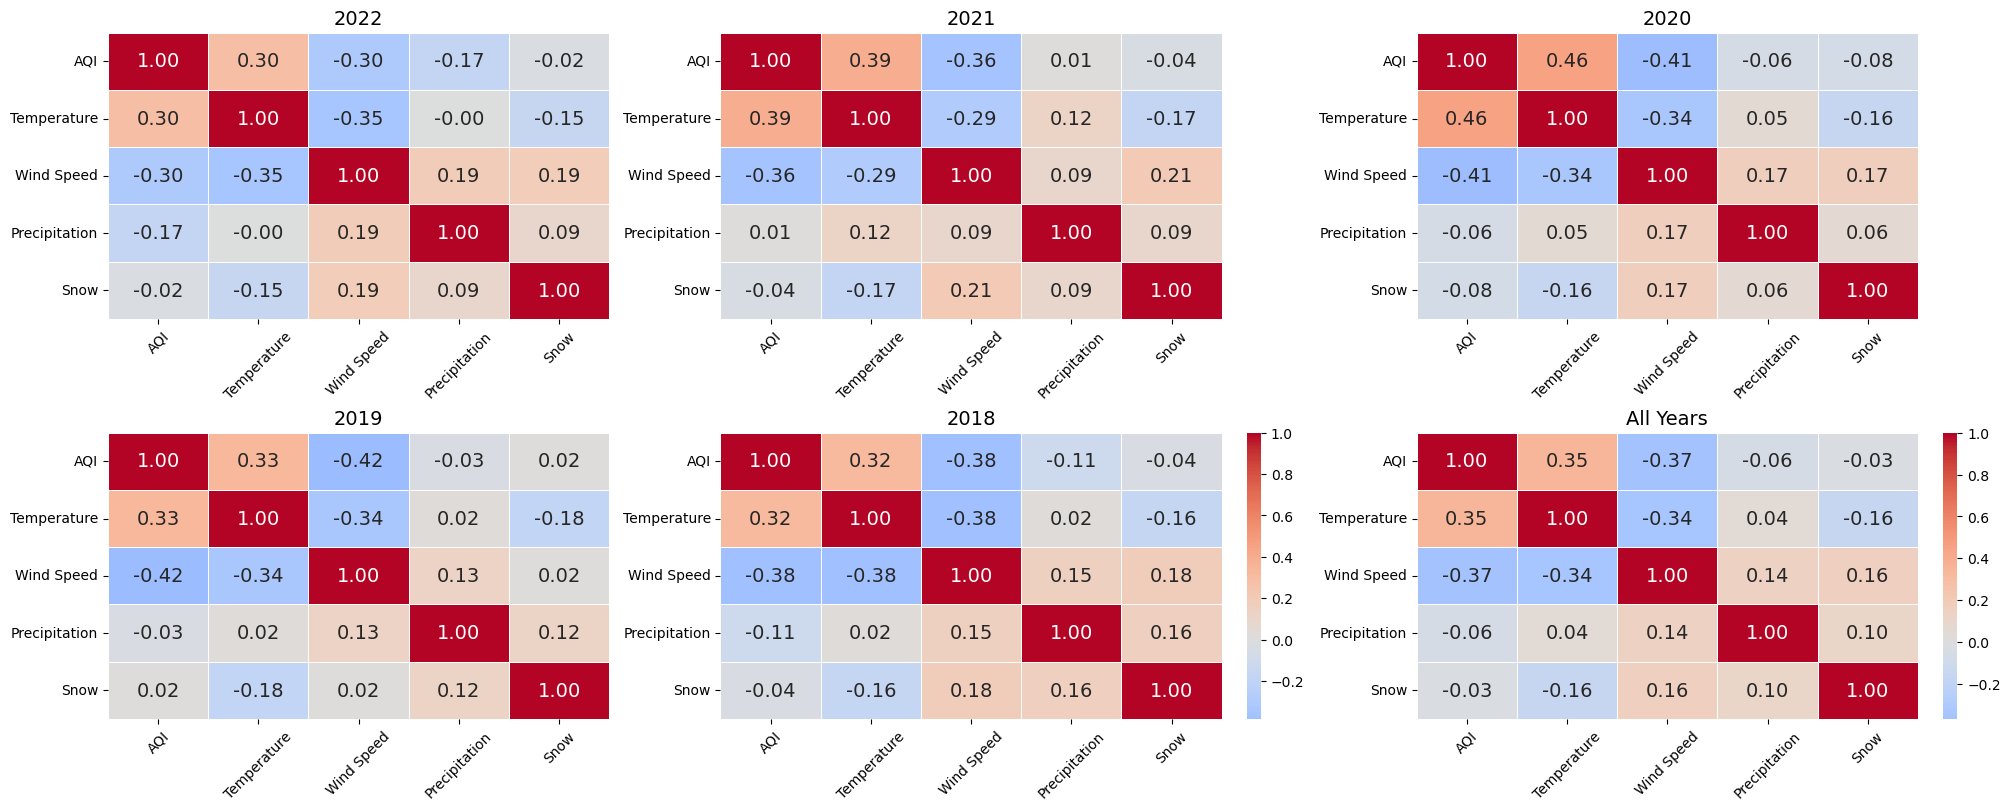

In [39]:
# Define the number of columns for the layout
num_columns = 3

# Calculate the number of rows needed
num_subplots = len(aqi_data) + 1  # One for each year + "All Years"
num_rows = math.ceil(num_subplots / num_columns)

# Initialize a figure with subplots for all years and one combined
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define the new column labels
new_labels = {
    'Overall AQI Value': 'AQI',
    'TAVG[°F]': 'Temperature',
    'WS[m/s]': 'Wind Speed',
    'PRCP[in]': 'Precipitation',
    'SNOW[in]': 'Snow'
}

# Iterate over each year and plot the heatmap in a specific subplot
for i, (year, df) in enumerate(aqi_data.items()):
    # Merge AQI data with meteorological data based on 'Date'
    merged_data = pd.merge(df, met_data, left_on='Date', right_index=True, how='inner')
    
    # Rename the columns according to the new labels
    merged_data = merged_data.rename(columns=new_labels)
    
    # Calculate the correlation matrix for the relevant variables
    correlation = merged_data[['AQI', 'Temperature', 'Wind Speed', 'Precipitation', 'Snow']].corr()
    
    # Select the corresponding subplot
    ax = axes[i]
    
    # Plot the heatmap
    sns.heatmap(
        correlation,
        annot=True,
        annot_kws={"size": 14},  # Increase font size of the annotations
        cmap='coolwarm',
        fmt='.2f',
        cbar=(i == len(aqi_data) - 1),  # Show colorbar only for the last heatmap
        linewidths=0.5,
        center=0,
        ax=ax
    )
    
    # Set the title for each heatmap
    ax.set_title(f'{year}', fontsize=14)
    ax.tick_params(axis='x', labelrotation=45)

# Combine all years' AQI data into one DataFrame
all_years_data = pd.concat(aqi_data.values(), ignore_index=True)

# Merge the combined AQI data with meteorological data based on 'Date'
merged_data = pd.merge(all_years_data, met_data, left_on='Date', right_index=True, how='inner')

# Rename the columns according to the new labels
merged_data = merged_data.rename(columns=new_labels)

# Calculate the correlation matrix for the relevant variables
correlation = merged_data[['AQI', 'Temperature', 'Wind Speed', 'Precipitation', 'Snow']].corr()

# Plot the heatmap for all years in the last subplot
sns.heatmap(
    correlation,
    annot=True,
    annot_kws={"size": 14},  # Increase font size of the annotations
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,  # Show colorbar for this heatmap
    linewidths=0.5,
    center=0,
    ax=axes[num_subplots - 1]
)

# Set the title for the combined heatmap
axes[num_subplots - 1].set_title('All Years', fontsize=14)
axes[num_subplots - 1].tick_params(axis='x', labelrotation=45)

# Remove any unused axes
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

# Save the plot
plt.savefig(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Images\correlation_results.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

Temperature (TAVG): Consistently shows a positive correlation with AQI, implying that higher temperatures may be linked to poorer air quality.
Wind Speed (WS): Shows a negative correlation with AQI in all years, suggesting that stronger winds tend to improve air quality by dispersing pollutants.
Precipitation (PRCP): Correlation with AQI is weak, with only slight indications of an inverse relationship in 2021 and 2022.
Snowfall (SNOW): Shows very weak to no correlation with AQI across all years, indicating minimal or no impact.

In [21]:
# Initialize an empty dictionary to store the means for each year
means_by_year = {}

# Loop through each year in the aqi_data dictionary
for year, df in aqi_data.items():
    # Merge AQI data with meteorological data based on 'Date'
    merged_data = pd.merge(df, met_data, left_on='Date', right_index=True, how='inner')
    
    # Calculate the mean for AQI and meteorological variables
    mean_values = merged_data[['Overall AQI Value', 'TAVG[°F]', 'WS[m/s]', 'PRCP[in]', 'SNOW[in]']].mean()
    
    # Store the results in the dictionary
    means_by_year[year] = mean_values

# Convert the dictionary to a DataFrame for better visualization
means_df = pd.DataFrame(means_by_year)  # Transpose to have years as rows
means_df.to_csv(r'C:\Users\Omid Emamjomehzadeh\Desktop\Project AQI\Outputs\annual means all variables.csv')

# Print the mean values for each year
print("Mean values for each year:")
print(means_df)

Mean values for each year:
                        2022       2021       2020       2019       2018
Overall AQI Value  54.356164  54.813699  52.655738  56.849315  58.934247
TAVG[°F]           56.810959  58.093151  58.281421  56.071233  56.704110
WS[m/s]            10.701178  10.380658  10.541311  10.772329  10.859589
PRCP[in]            0.121205   0.134055   0.114645   0.139342   0.161205
SNOW[in]            0.068956   0.070411   0.034973   0.042466   0.096164


In [13]:
# Initialize an empty dictionary to store the means for each year
means_by_year = {}

# Loop through each year in the aqi_data dictionary
for year, df in aqi_data.items():
    # Merge AQI data with meteorological data based on 'Date'
    merged_data = pd.merge(df, met_data, left_on='Date', right_index=True, how='inner')
    
    # Calculate the mean for AQI and meteorological variables
    mean_values = merged_data[['Overall AQI Value', 'TAVG[°F]', 'WS[m/s]', 'PRCP[in]', 'SNOW[in]']].mean()
    
    # Store the results in the dictionary
    means_by_year[year] = mean_values

# Convert the dictionary to a DataFrame for better visualization
means_df = pd.DataFrame(means_by_year).T  # Transpose to have years as rows
means_df
# Calculate the overall mean for each variable across all years
overall_means = means_df.mean()

# Divide each year's mean by the overall mean for the corresponding variable
means_normalized = means_df.divide(overall_means)

# Print the normalized (divided by overall mean) values for each year
print("Normalized mean values for each year (divided by the overall mean):")
print(means_normalized)

Normalized mean values for each year (divided by the overall mean):
      Overall AQI Value  TAVG[°F]   WS[m/s]  PRCP[in]  SNOW[in]
2022           0.979005  0.993334  1.004710  0.903907  1.101640
2021           0.987246  1.015753  0.974617  0.999733  1.124884
2020           0.948379  1.019045  0.989700  0.854980  0.558723
2019           1.023909  0.980400  1.011390  1.039167  0.678432
2018           1.061461  0.991466  1.019583  1.202213  1.536320


In [14]:
overall_means

Overall AQI Value    55.521832
TAVG[°F]             57.192175
WS[m/s]              10.651013
PRCP[in]              0.134091
SNOW[in]              0.062594
dtype: float64

In [15]:
# Initialize an empty DataFrame to hold the merged data for all years
merged_all_years = pd.DataFrame()

# Loop through each year in the aqi_data dictionary
for year, df in aqi_data.items():
    # Merge AQI data with meteorological data based on 'Date'
    merged_data = pd.merge(df, met_data, left_on='Date', right_index=True, how='inner')
    
    # Append the merged data to the final DataFrame
    merged_all_years = pd.concat([merged_all_years, merged_data])

# Define the dependent variable (AQI Value) and independent variables (Meteorological data)
X = merged_all_years[['TAVG[°F]', 'WS[m/s]', 'PRCP[in]', 'SNOW[in]']]
y = merged_all_years['Overall AQI Value']

# Drop rows with any missing values (NaNs) in either X or y
merged_data_clean = merged_all_years.dropna(subset=['TAVG[°F]', 'WS[m/s]', 'PRCP[in]', 'SNOW[in]', 'Overall AQI Value'])

# Redefine X and y after removing rows with missing values
X_clean = merged_data_clean[['TAVG[°F]', 'WS[m/s]', 'PRCP[in]', 'SNOW[in]']]
y_clean = merged_data_clean['Overall AQI Value']

# Add a constant to the model (for the intercept)
X_clean = sm.add_constant(X_clean)

# Perform the OLS regression
model = sm.OLS(y_clean, X_clean).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Overall AQI Value   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     110.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.65e-84
Time:                        10:20:25   Log-Likelihood:                -8040.6
No. Observations:                1825   AIC:                         1.609e+04
Df Residuals:                    1820   BIC:                         1.612e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.3623      2.516     21.206      0.0

Key Statistics:
R-squared: 0.195

This value represents the proportion of the variance in the Overall AQI Value that is explained by the independent variables (TAVG[°F], WS[m/s], PRCP[in], SNOW[in]). In this case, only 19.5% of the variation in AQI can be explained by the meteorological variables in the model. This suggests that other factors not included in the model (such as local pollution sources, geographic factors, etc.) may be influencing AQI.
Adjusted R-squared: 0.193

This is a more conservative measure of model fit that adjusts for the number of predictors. It's slightly lower than the R-squared, which suggests that the inclusion of these variables is not significantly improving the model fit.
F-statistic: 110.4, p-value: 2.65e-84

The F-statistic tests whether at least one of the predictors in the model is significantly related to the dependent variable (AQI). With a very small p-value (2.65e-84), we can reject the null hypothesis and conclude that the model as a whole is significant. In other words, at least one of the meteorological variables has a statistically significant relationship with AQI.
AIC (Akaike Information Criterion): 1.609e+04, BIC (Bayesian Information Criterion): 1.612e+04

These are model selection criteria that help assess the model's goodness of fit while penalizing for the number of parameters. Lower values of AIC and BIC indicate better models, though these values are mainly useful for model comparison.
Coefficients Interpretation:
Each coefficient represents the average change in the Overall AQI Value for a one-unit change in the respective independent variable, holding other variables constant.

const (Intercept): 53.3623

This is the estimated AQI value when all independent variables are zero. While not directly meaningful in the real-world context (since temperatures, wind speeds, etc., are never zero), it provides the baseline AQI value in the absence of the meteorological factors.
TAVG[°F] (Temperature): 0.3376

For each 1°F increase in average temperature, the AQI is expected to increase by 0.3376 units, assuming all other variables are constant. This positive relationship suggests that warmer temperatures are associated with a higher AQI.
WS[m/s] (Wind Speed): -1.5953

For each 1 m/s increase in wind speed, the AQI is expected to decrease by 1.5953 units, assuming all other variables are constant. This negative relationship indicates that higher wind speeds tend to reduce AQI, likely by dispersing pollutants.
PRCP[in] (Precipitation): -2.3739

For each 1-inch increase in precipitation, the AQI is expected to decrease by 2.3739 units, though this result is not strongly significant (p-value = 0.081, slightly above the 0.05 threshold). This suggests that precipitation might have a negative impact on AQI, potentially by washing pollutants out of the air, but the evidence is not very strong.
SNOW[in] (Snowfall): 2.2645

For each 1-inch increase in snowfall, the AQI is expected to increase by 2.2645 units, assuming all other variables are constant. This positive relationship suggests that snow may be associated with higher AQI, possibly due to snow-melt runoff carrying pollutants, or other local factors.
Statistical Significance:
p-values for TAVG[°F], WS[m/s], and SNOW[in] are all less than 0.05, indicating that these variables have a statistically significant effect on AQI.
The p-value for PRCP[in] is 0.081, which is slightly above the 0.05 threshold, suggesting that precipitation may not be as strongly associated with AQI in this model, but it still has a moderate effect.
Model Diagnostics:
Omnibus Test: The p-value (0.000) suggests that the residuals (differences between observed and predicted values) do not follow a normal distribution, which may be a concern for the validity of some of the regression assumptions.
Durbin-Watson: 1.030: This statistic tests for autocorrelation in the residuals. A value close to 2 indicates no autocorrelation, and here the value is closer to 1, indicating some positive autocorrelation in the residuals. This may suggest that the residuals are not independent, which could affect model validity.
Skew and Kurtosis: The skew and kurtosis values suggest that the residuals are not perfectly normal, with some skewness (positive skew) and heavy tails (high kurtosis). This indicates that the residuals are not normally distributed, which might impact the reliability of some statistical tests, though it doesn't necessarily invalidate the model.
Conclusion:
The regression model explains a modest portion of the variance in AQI (19.5%).
Temperature (TAVG[°F]), wind speed (WS[m/s]), and snowfall (SNOW[in]) have statistically significant effects on AQI.
Precipitation (PRCP[in]) has a less clear effect and is not statistically significant at the 5% level.
The model's residuals exhibit some signs of non-normality and autocorrelation, which could affect the robustness of the results, but the model still provides useful insights into how meteorological variables are related to AQI.

Mean Squared Error: 266.3502263056411
R-squared: 0.39304764233398737


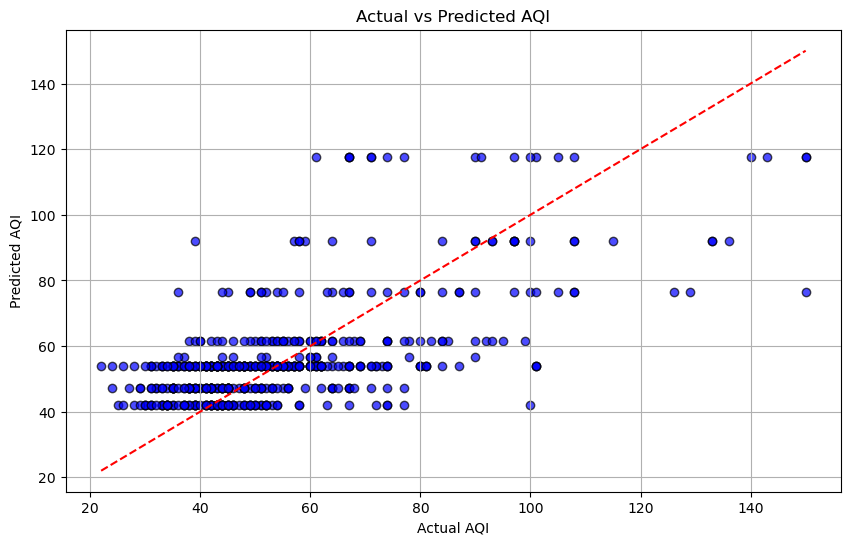

In [16]:
# Initialize an empty DataFrame to hold the merged data for all years
merged_all_years = pd.DataFrame()

# Loop through each year in the aqi_data dictionary
for year, df in aqi_data.items():
    # Merge AQI data with meteorological data based on 'Date'
    merged_data = pd.merge(df, met_data, left_on='Date', right_index=True, how='inner')
    
    # Append the merged data to the final DataFrame
    merged_all_years = pd.concat([merged_all_years, merged_data])

df = merged_all_years  # Final merged DataFrame

# Independent variables (meteorological data) and dependent variable (AQI)
X = df[['TAVG[°F]', 'WS[m/s]', 'PRCP[in]', 'SNOW[in]']]  # Independent variables
y = df['Overall AQI Value']  # Dependent variable (AQI)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42, max_depth=3)

model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted AQI values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


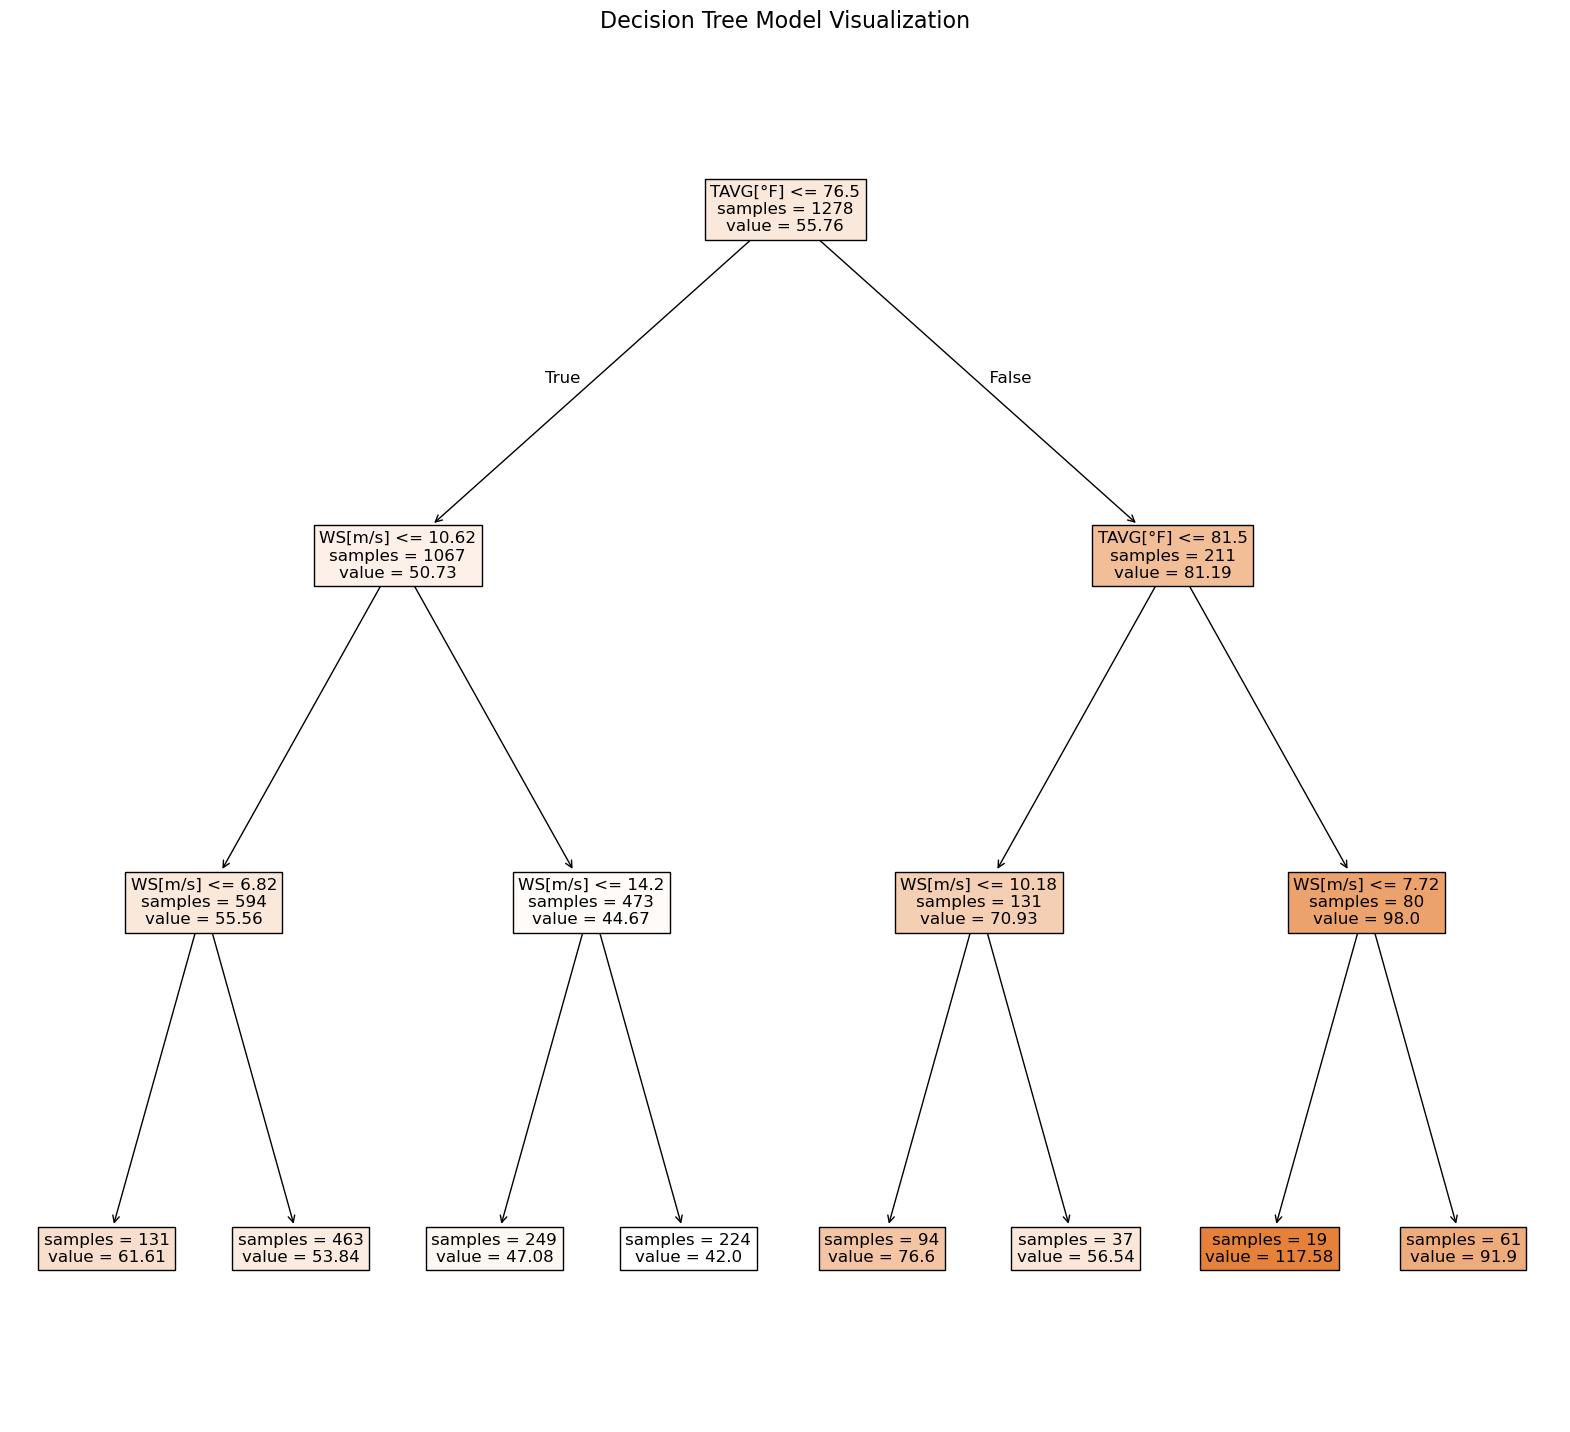

In [17]:
# Optionally, visualize the decision tree
plt.figure(figsize=(20, 18))  # Increase figure size
plot_tree(model, filled=True, feature_names=X.columns, fontsize=12, impurity=False, precision=2)

# Adding a title
plt.title('Decision Tree Model Visualization', fontsize=16)
plt.show()
